# 불용어 미이용

In [14]:
import nltk
from nltk import ngrams
from collections import Counter
import pandas as pd
from konlpy.tag import Okt

# 텍스트 데이터
df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')

# 텍스트를 단어로 분할
okt = Okt()

# n-그램 생성 (예: 2-그램)
bigrams0 = []

# 각 판례 내용에 대해 토큰화 및 n-그램 생성
for doc in df['판례내용'].iloc[:200]:  # 필요한 만큼의 문서만 사용
    tokens = okt.nouns(doc)  # 개별 문서에 대해 명사 추출
    bigrams0.extend(ngrams(tokens, 2))  # 2-그램 생성


# n-그램 빈도수 계산
bigram0_counts = Counter(bigrams0)

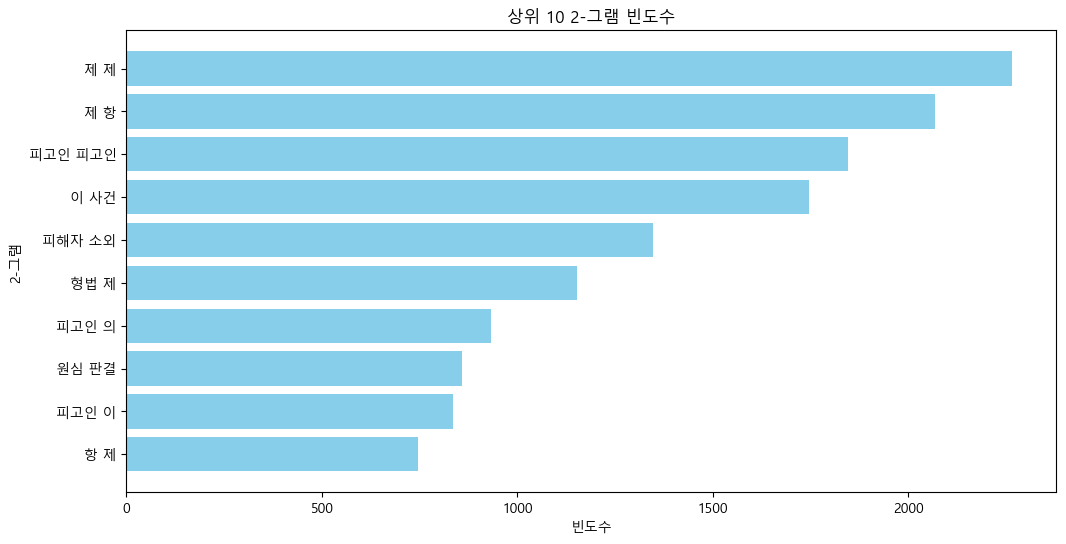

In [15]:
import matplotlib.pyplot as plt

# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams0 = bigram0_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams0, counts = zip(*top_bigrams0)

# n-그램을 문자열로 변환
bigram0_labels = [' '.join(bigram) for bigram in bigrams0]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram0_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('2-그램')
plt.title(f'상위 {top_n} 2-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

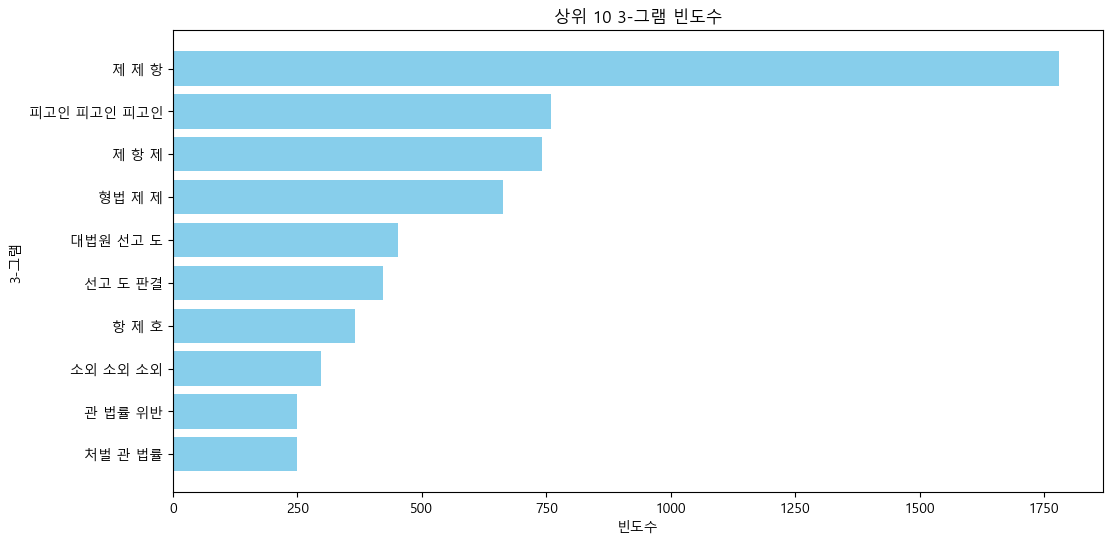

In [16]:
# n-그램 생성 (예: 2-그램)
bigrams03 = []

# 각 판례 내용에 대해 토큰화 및 n-그램 생성
for doc in df['판례내용'].iloc[:200]:  # 필요한 만큼의 문서만 사용
    tokens = okt.nouns(doc)  # 개별 문서에 대해 명사 추출
    bigrams03.extend(ngrams(tokens, 3))  # 2-그램 생성
    
# n-그램 빈도수 계산
bigram03_counts = Counter(bigrams03)

# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams03 = bigram03_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams03, counts = zip(*top_bigrams03)

# n-그램을 문자열로 변환
bigram03_labels = [' '.join(bigram) for bigram in bigrams03]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram03_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('3-그램')
plt.title(f'상위 {top_n} 3-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

# 불용어 이용

In [11]:
import nltk
from nltk import ngrams
from collections import Counter
import pandas as pd
from konlpy.tag import Okt
import pickle

# 1. 피클 파일에서 Series 불러오기
with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)
    
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

# 단어 단위로 토큰화 하고 불용어를 제거하기
tokenized_docs = []

for doc in normalized:  # normalized 시리즈에서 각 문서 처리
    # 불용어를 제거한 명사 리스트로 저장
    filtered_tokens = [word for word in doc.split() if word not in stopwords]  
    tokenized_docs.append(filtered_tokens)  # 리스트로 저장



[(('보험', '계약'), 6107), (('보험금', '지급'), 2546), (('계약', '보험'), 1809), (('지급', '의무'), 1762), (('비용', '부담'), 1491), (('자동차', '보험'), 1358), (('손해', '배상'), 1328), (('소송비용', '부담'), 1303), (('보험', '자동차'), 1161), (('후유', '장해'), 1157)]


In [14]:
# n-그램 생성 함수 정의
def generate_ngrams(tokenized_docs, n):
    ngram_list = []  # n-그램을 저장할 리스트 초기화
    
    # 각 문서에서 n-그램을 생성
    for tokens in tokenized_docs:
        if len(tokens) >= n:  # n개의 단어가 있는 경우만 처리
            for ngram in ngrams(tokens, n):  # n-그램 생성
                # n-그램의 모든 단어가 동일하지 않은 경우만 추가
                if len(set(ngram)) == len(ngram):  # 중복된 단어가 없을 때만 추가
                    ngram_list.append(ngram)  # n-그램 추가

    return ngram_list  # 생성된 n-그램 리스트 반환

# n-그램 생성 호출
n = 2  # n-그램의 크기 (예: 2-그램)
bigrams = generate_ngrams(tokenized_docs, n)  # 2-그램 생성

n = 3  # n-그램의 크기 (예: 3-그램)
trigrams = generate_ngrams(tokenized_docs, n)  # 3-그램 생성

# n-그램 빈도수 계산
bigram_counts = Counter(bigrams)  # 2-그램 빈도수 계산
trigram_counts = Counter(trigrams)  # 3-그램 빈도수 계산

# 결과 출력
print("Top 10 Bigrams:")
print(bigram_counts.most_common(10))  # 상위 10개 2-그램 출력

print("Top 10 Trigrams:")
print(trigram_counts.most_common(10))  # 상위 10개 3-그램 출력

Top 10 Bigrams:
[(('보험', '계약'), 6107), (('보험금', '지급'), 2546), (('계약', '보험'), 1809), (('지급', '의무'), 1762), (('비용', '부담'), 1491), (('자동차', '보험'), 1358), (('손해', '배상'), 1328), (('소송비용', '부담'), 1303), (('보험', '자동차'), 1161), (('후유', '장해'), 1157)]
Top 10 Trigrams:
[(('지연손해금', '지급', '의무'), 689), (('산업', '재해', '보험'), 684), (('해상', '보험', '주식회사'), 579), (('지급', '소송비용', '부담'), 533), (('자동차', '손해배상', '보장'), 531), (('호로', '개정', '전의'), 494), (('노동', '상실', '률'), 479), (('화재', '해상', '보험'), 471), (('국민', '건강', '보험'), 453), (('계산', '돈', '지급'), 439)]


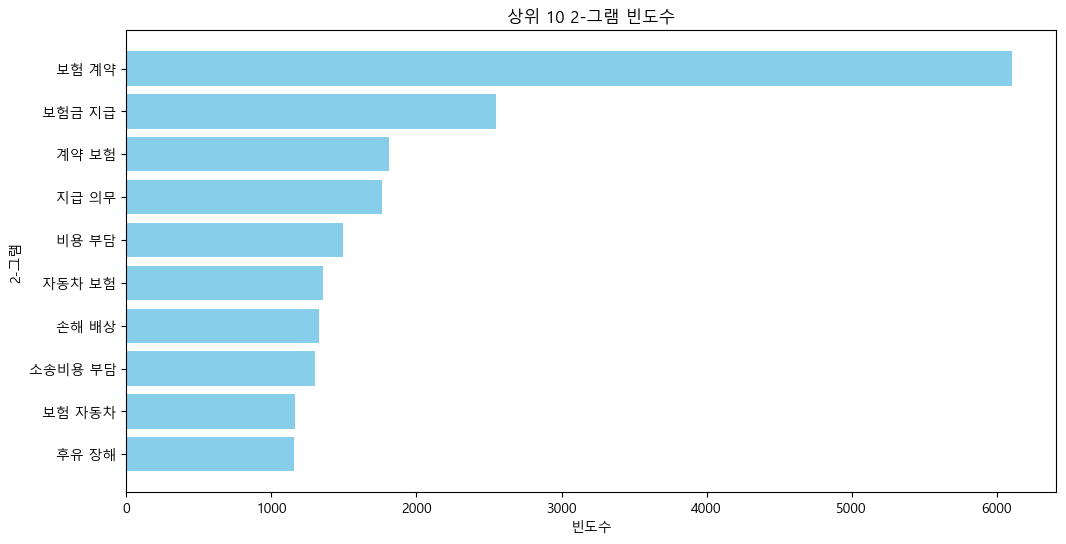

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로 (시스템에 따라 변경)
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())


# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams = bigram_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams, counts = zip(*top_bigrams)

# n-그램을 문자열로 변환
bigram_labels = [' '.join(bigram) for bigram in bigrams]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('2-그램')
plt.title(f'상위 {top_n} 2-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

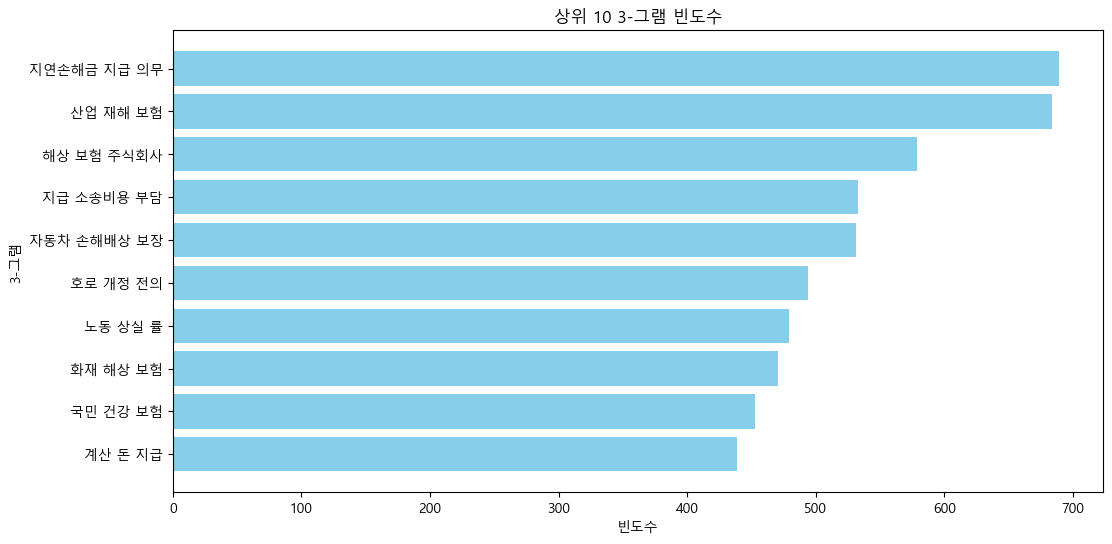

In [17]:
# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams3 = trigram_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
trigrams, counts = zip(*top_bigrams3)

# n-그램을 문자열로 변환
trigrams_labels = [' '.join(trigram) for trigram in trigrams]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(trigrams_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('3-그램')
plt.title(f'상위 {top_n} 3-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

추가적인 불용어가 필요하다.